<a href="https://colab.research.google.com/github/LidianoJesus/Basic-Projects/blob/master/004_Case_Engenharia_Prever_resist%C3%AAncia_do_concreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modelo de Regressão Linear Simples**
## **Case: Engenharia**
Nesse caso foi usado os dados 'Base_Resistencia_Concreto.csv'

In [ ]:
# Libs necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1º Etapa - Tratamento dos dados

In [ ]:
# Lendo a base de dados
Base_Dados = pd.read_csv('Base_Resistencia_Concreto.csv')

In [ ]:
# Verificar os dados gerais
Base_Dados.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
# Renomeando as colunas
Base_Dados.rename( columns={
    'Cement' : 'Cimento',
    'Blast Furnace Slag' : 'Escória_Alto_Forno',
    'Fly Ash' : 'Cinzas_volantes',
    'Water' : 'Agua',
    'Superplasticizer' : 'Superplastificante',
    'Coarse Aggregate' : 'Agregado_Grosso',
    'Fine Aggregate' : 'Agregado_fino',
    'Age' : 'Idade',
    'Strength' : 'Resistencia_Cimento',
}, inplace=True )

In [ ]:
# Verificar a formatação do tipo dos dados
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cimento              1030 non-null   float64
 1   Escória_Alto_Forno   1030 non-null   float64
 2   Cinzas_volantes      1030 non-null   float64
 3   Agua                 1030 non-null   float64
 4   Superplastificante   1030 non-null   float64
 5   Agregado_Grosso      1030 non-null   float64
 6   Agregado_fino        1030 non-null   float64
 7   Idade                1030 non-null   int64  
 8   Resistencia_Cimento  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


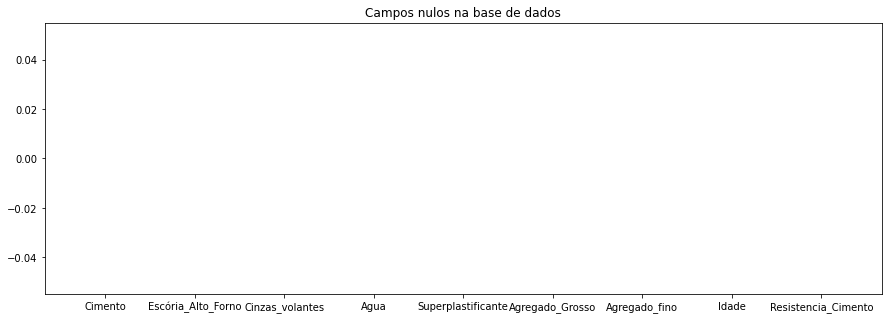

In [ ]:
# Verificando campos nulos
plt.figure( figsize=(15,5) )
Analise = Base_Dados.isnull().sum()
plt.bar( Analise.index, Analise, width=0.5, color='green' )
plt.title('Campos nulos na base de dados');

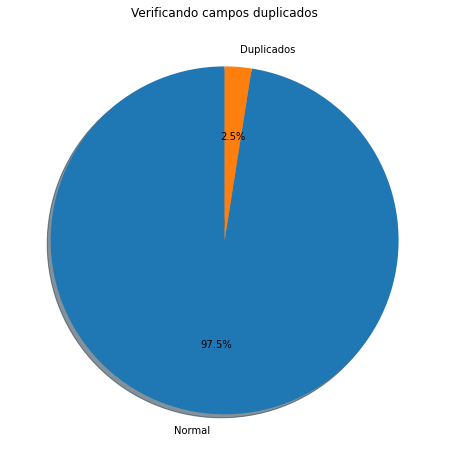

In [ ]:
# Verificando campos duplicados

# Analise dos campos duplicados
Campos_Duplicados = Base_Dados.duplicated().sum()
Total_Base = len( Base_Dados) - Campos_Duplicados
Lista_Valores = [ 1 - ( Campos_Duplicados / Total_Base ) , ( Campos_Duplicados / Total_Base ) ]
Rotulos = ['Normal', 'Duplicados']

# Plotagem
plt.figure( figsize=(8, 8) )
plt.pie( Lista_Valores, 
        labels=Rotulos, 
        shadow=True, 
        startangle=90, 
        autopct='%1.1f%%' )
plt.title('Verificando campos duplicados');

In [ ]:
# Vamos retirar os dados duplicados
print('Antes da remoção:', Base_Dados.shape[0] )

# Removendo as duplicadas
Base_Dados.drop_duplicates(inplace=True)

print('Depois:', Base_Dados.shape[0] )

Antes da remoção: 1030
Depois: 1005


In [ ]:
# Verificar campos unicos
Base_Dados.nunique()

# Veja ... tempos diversos tipos de caracteristicas em nossos dados

Cimento                278
Escória_Alto_Forno     185
Cinzas_volantes        156
Agua                   195
Superplastificante     111
Agregado_Grosso        284
Agregado_fino          302
Idade                   14
Resistencia_Cimento    845
dtype: int64

## **2º Etapa - EDA**

In [ ]:
# Estatisticas
Base_Dados.describe()

,Cimento,Escória_Alto_Forno,Cinzas_volantes,Agua,Superplastificante,Agregado_Grosso,Agregado_fino,Idade,Resistencia_Cimento
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


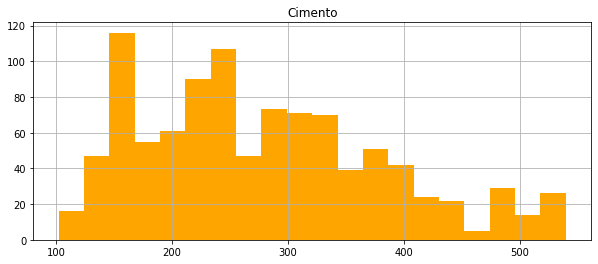

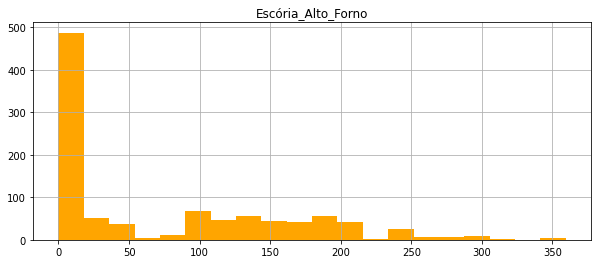

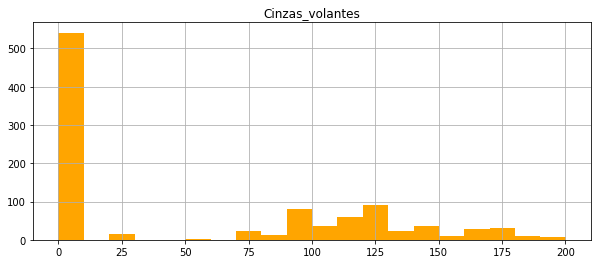

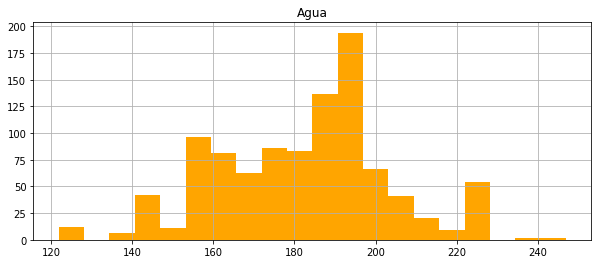

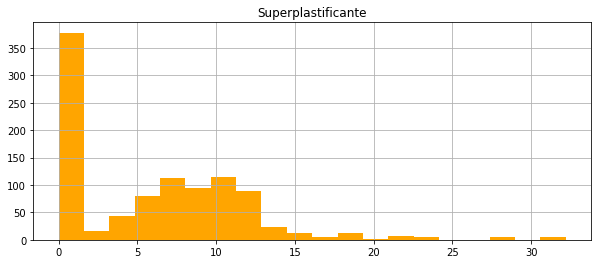

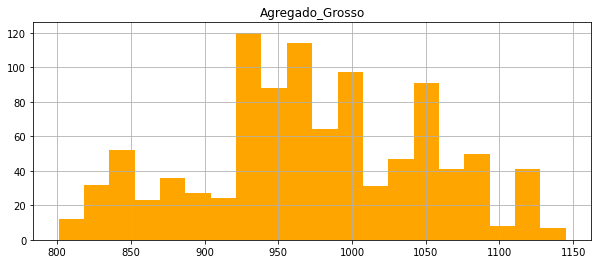

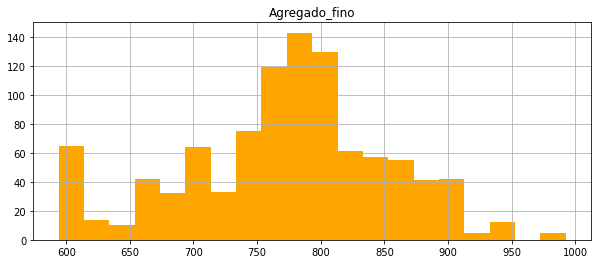

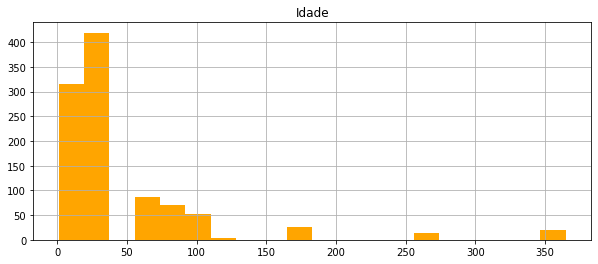

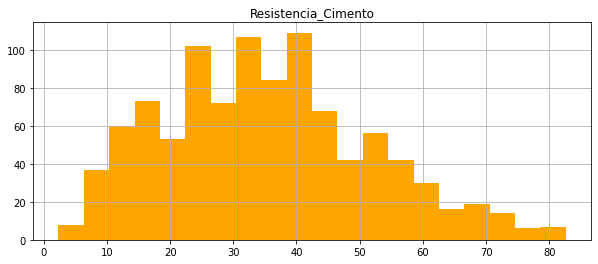

In [ ]:
# Plotar todas as colunas
for Coluna in Base_Dados.columns:
  # Defiindo o tamanho
  plt.figure(figsize=(10,4))
  # Titulo
  plt.title(Coluna)
  # Plot do gráfico
  Base_Dados[Coluna].hist( bins=20, color='orange' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

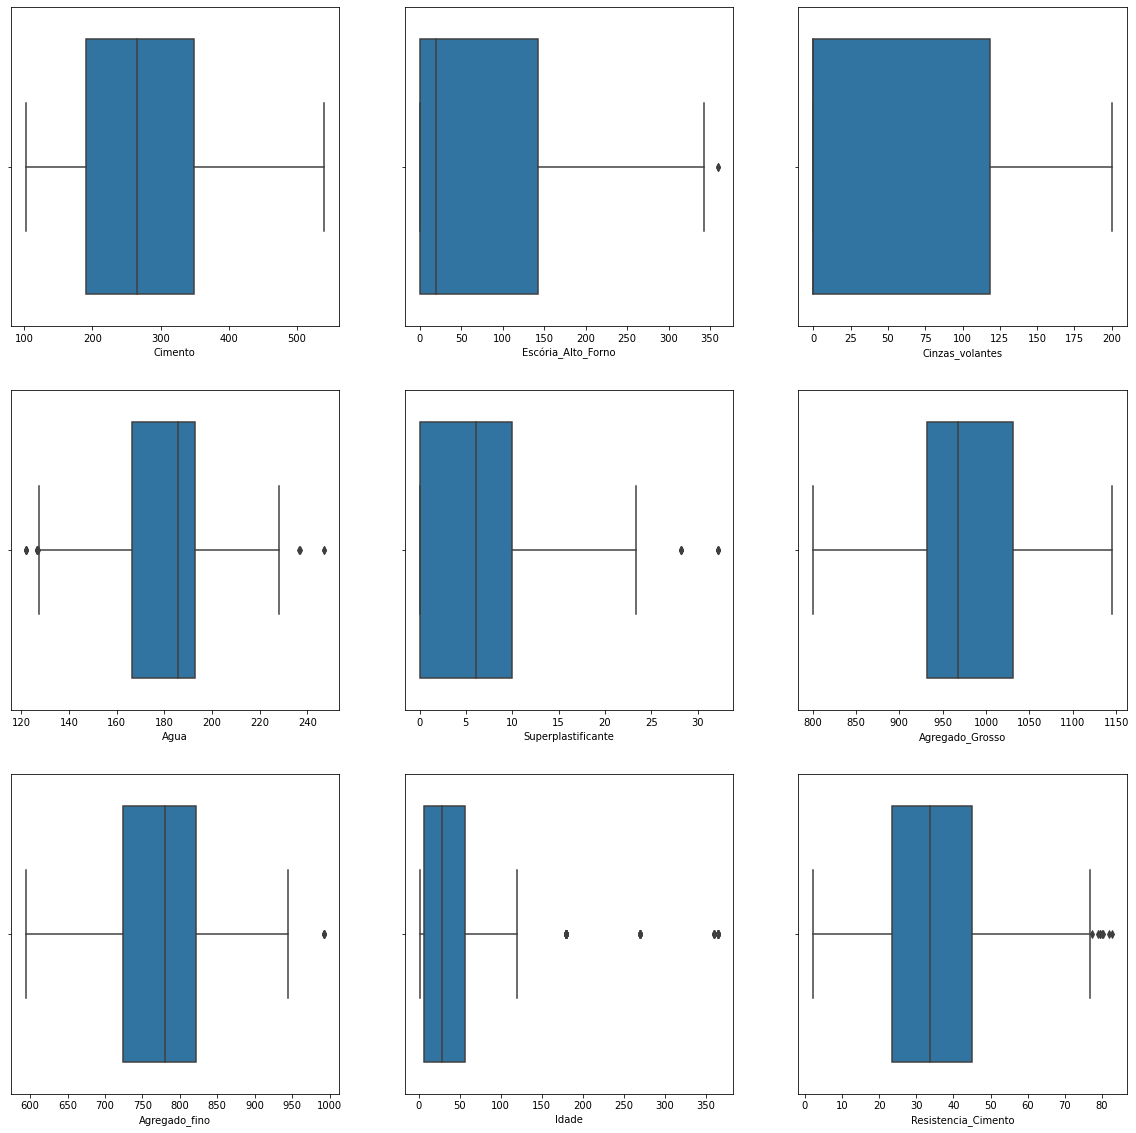

In [ ]:
# Definir o tamanho e grade do nosso gráfico
Figura, Eixos = plt.subplots(3, 3, figsize = (20,20));

# Variaveil de apoio no Loop
Loop = 0

# Nome das colunas
Colunas = Base_Dados.columns.tolist()

# Vamos plotar 3 gráficos por linhas
for Loop_Geral in range(3):

    for Loop_Linha in range(3):

        # Incluir o Try caso haja algum erro
        try:
            sns.boxplot( Base_Dados[Colunas[Loop]] , 
                        ax=Eixos[Loop_Geral][Loop_Linha], 
                        orient='h' );
            Loop += 1
        except:
            pass

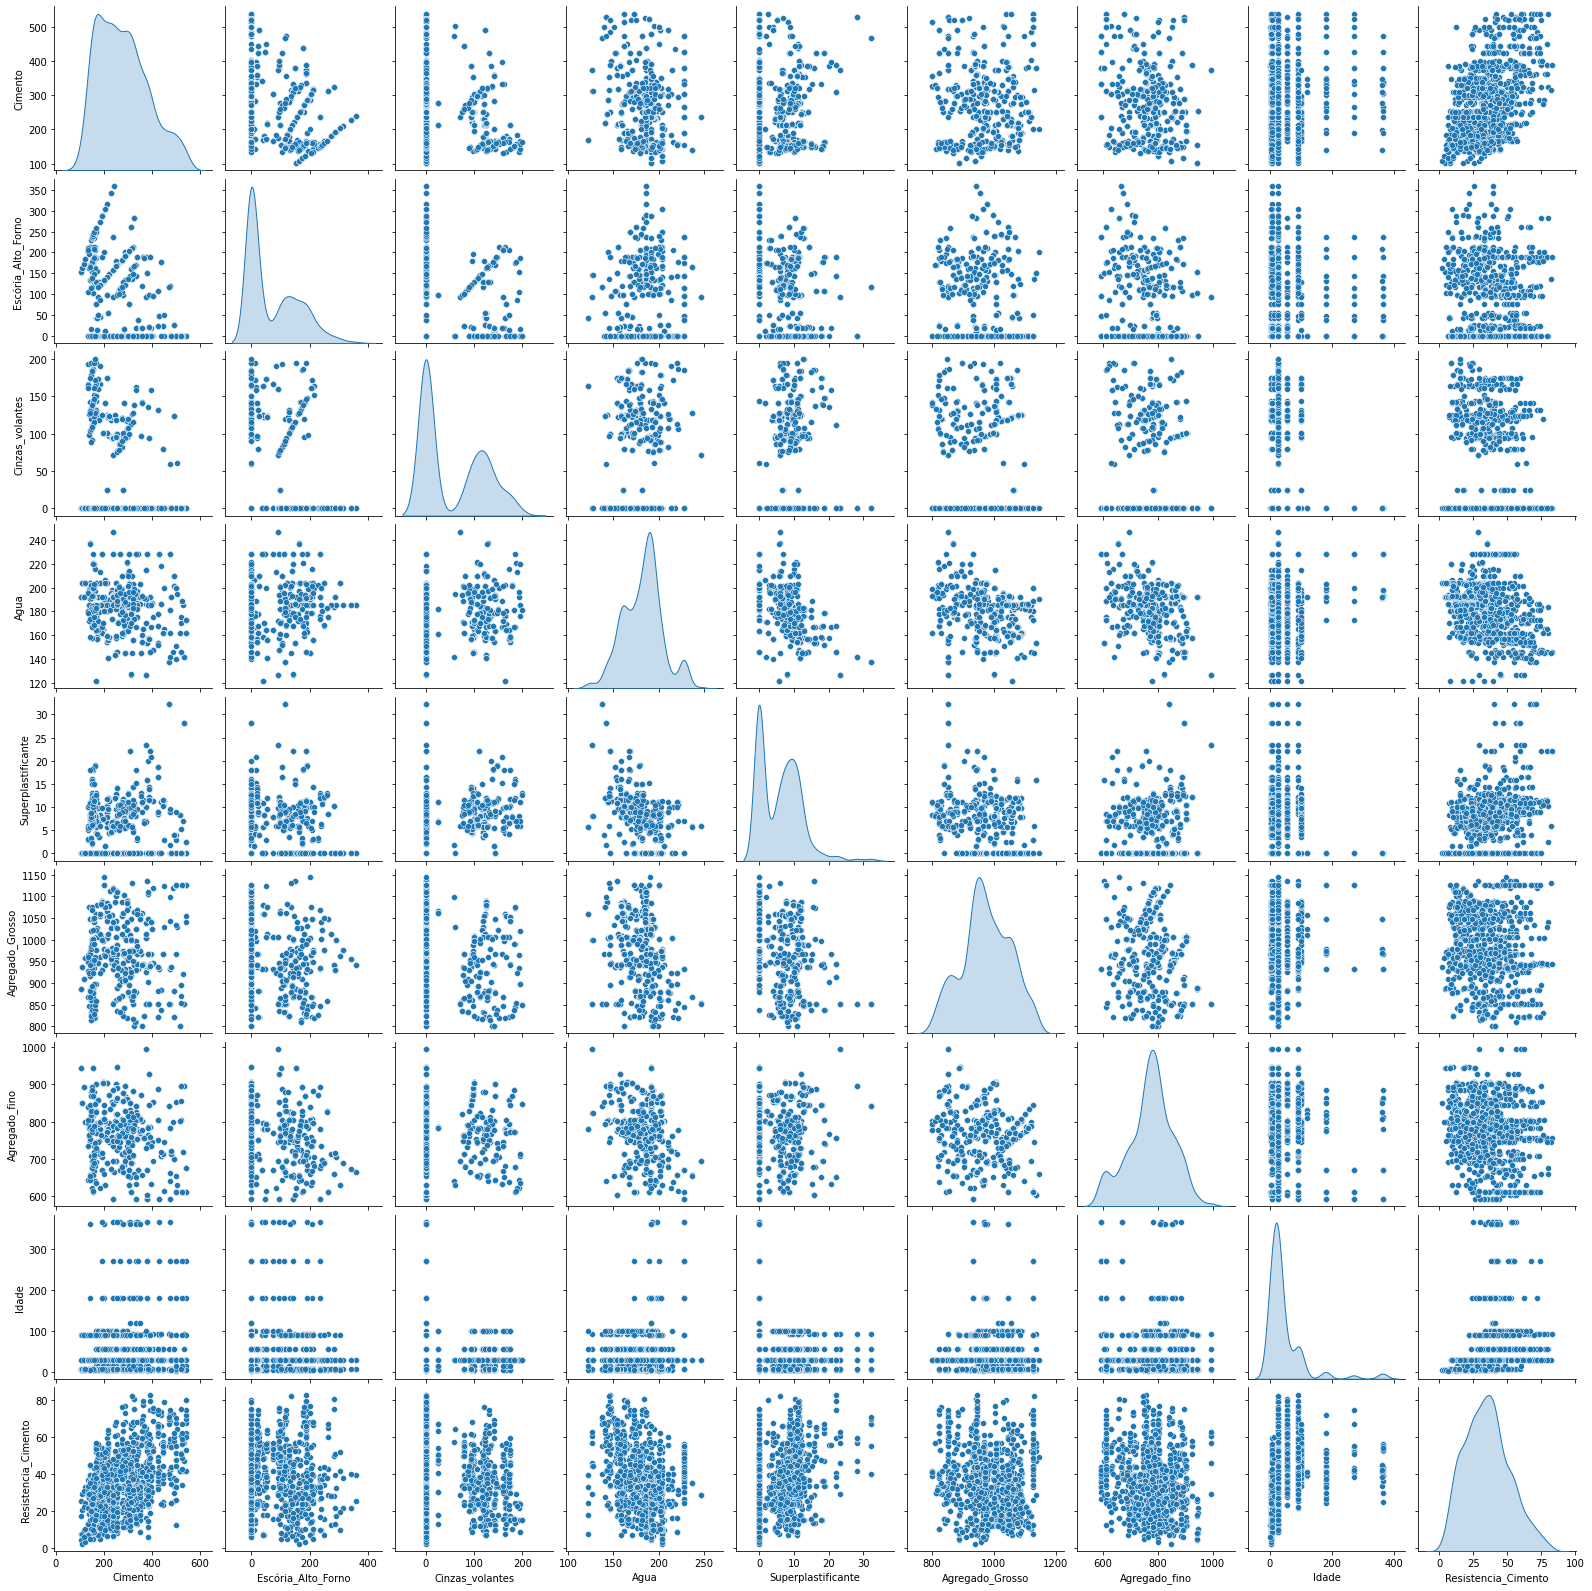

In [ ]:
# Plot geral
sns.pairplot(Base_Dados, diag_kind='kde');

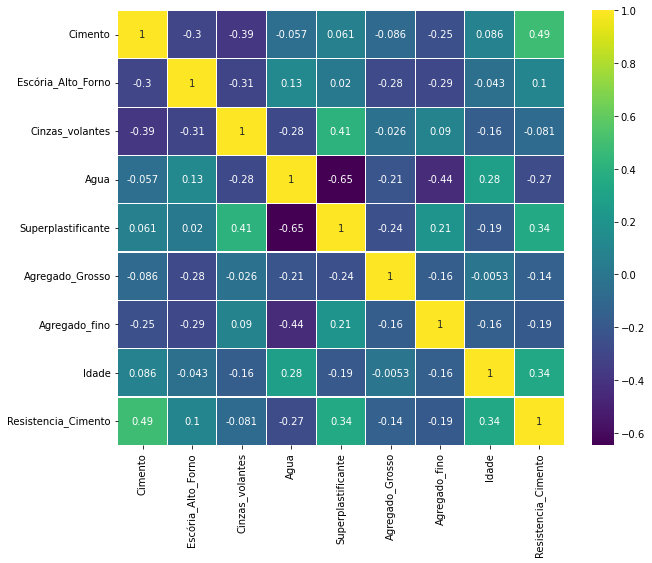

In [ ]:
# --- Analisando as correlações nos dados

# Função para analisar correlação
Correlacao = Base_Dados.corr() 

# Definindo Tamanho do Gráfico
plt.figure(figsize=(10, 8)) 

# Fazendo o plot do gráfico
sns.heatmap(Correlacao, linewidths=.1, cmap='viridis', annot=True);

## **3º Etapa - Preparação dos Dados**

In [ ]:
# Separando os dados
Variaveis_Caracteristica = Base_Dados.drop('Resistencia_Cimento', axis=1)
Variaveil_Prever = Base_Dados[['Resistencia_Cimento']]

# Importando a função para separar os dados de Treino e Teste
from sklearn.model_selection import train_test_split

# Separando os dados
x_treino, x_teste, y_treino, y_teste = train_test_split( Variaveis_Caracteristica, 
                                                        Variaveil_Prever, 
                                                        test_size=0.20, 
                                                        random_state=10 )

print('Dados de Treino: ', len(x_treino) )
print('Dados de Teste: ', len(x_teste) )

Dados de Treino:  804
Dados de Teste:  201


## **4º Etapa - Treinamento do Modelo**

In [ ]:
# Importando função da Regressão
from sklearn.linear_model import LinearRegression

# Chamando a função e treinando o modelo
Funcao_Regressao_Linear = LinearRegression()
Funcao_Regressao_Linear.fit( x_treino, y_treino )

# extrair coeficientes
Declive = Funcao_Regressao_Linear.coef_
Interceptar = Funcao_Regressao_Linear.intercept_

# Fazendo a previsao dos de teste
Previsao = Funcao_Regressao_Linear.predict( x_teste )


 Score do modelo (R²):  0.6036657320434023

 RMSE 7.653462183617472 



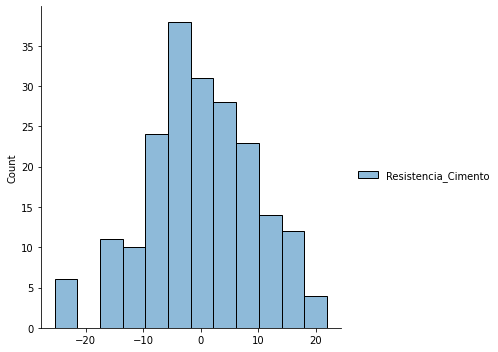

In [ ]:
# Verificando a assertividade do modelo
from sklearn import metrics

# Calculando o score da regressão
Score = Funcao_Regressao_Linear.score( Variaveis_Caracteristica, Variaveil_Prever )

# Calculando o RMSE do modelo
RMSE = metrics.mean_absolute_error( y_teste, Previsao )

print('\n Score do modelo (R²): ', Score)
print('\n RMSE', RMSE , '\n' )
sns.displot( y_teste - Previsao );

## **Como temos valores em largas escalas , vamos fazer o escolonamento dos dados para verificar se ganhamos algumas performance**

## **Aplicando o escolonamento**


 Score do modelo (R²):  0.594517569449642

 RMSE 7.65346218361747 



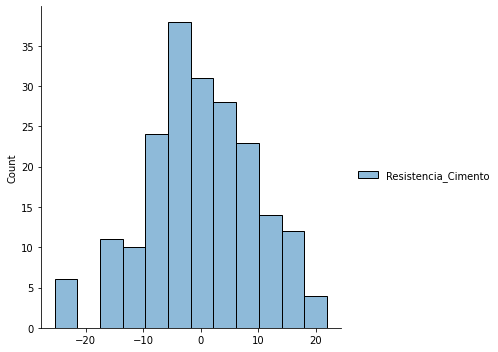

In [ ]:
# Bilbioteca para fazer o escalonamento dos Dados
from sklearn.preprocessing import StandardScaler

# Função para escalar os dados
Escalonamento = StandardScaler()

# Aplicando o Escalamento
Escala_Treino = Escalonamento.fit_transform(x_treino)
Escala_Teste = Escalonamento.transform(x_teste)

# ----------- Treinando o modelo de Regressão

# Importando função da Regressão
from sklearn.linear_model import LinearRegression

# Chamando a função e treinando o modelo
Funcao_Regressao_Linear_02 = LinearRegression()
Funcao_Regressao_Linear_02.fit( Escala_Treino, y_treino )

# extrair coeficientes
Declive = Funcao_Regressao_Linear_02.coef_
Interceptar = Funcao_Regressao_Linear_02.intercept_

# Fazendo a previsao dos de teste
Previsao = Funcao_Regressao_Linear_02.predict( Escala_Teste )

# ----------- Plotando o Erro do Modelo com o Escolanemento

# Verificando a assertividade do modelo
from sklearn import metrics

# Calculando o score da regressão
Score = Funcao_Regressao_Linear_02.score( Escala_Treino, y_treino )

# Calculando o RMSE do modelo
RMSE = metrics.mean_absolute_error( y_teste, Previsao )

print('\n Score do modelo (R²): ', Score)
print('\n RMSE', RMSE , '\n' )
sns.displot( y_teste - Previsao );

## **Vamos tentar melhorar nosso modelo ...**

Vamos usar um pipeline ... pipeline são transformadores

In [ ]:
# Vamos importar as Libs que vamos precisar
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Separando os dados
Variaveis_Caracteristica = Base_Dados.drop('Resistencia_Cimento', axis=1)
Variaveil_Prever = Base_Dados[['Resistencia_Cimento']]

# Importando a função para separar os dados de Treino e Teste
from sklearn.model_selection import train_test_split

# Separando os dados
x_treino, x_teste, y_treino, y_teste = train_test_split( Variaveis_Caracteristica, 
                                                        Variaveil_Prever, 
                                                        test_size=0.20, 
                                                        random_state=10 )

print('Dados de Treino: ', len(x_treino) )
print('Dados de Teste: ', len(x_teste) )

Dados de Treino:  804
Dados de Teste:  201



 Score do modelo (R²):  0.7948950018263439

 RMSE 5.111539150452694 



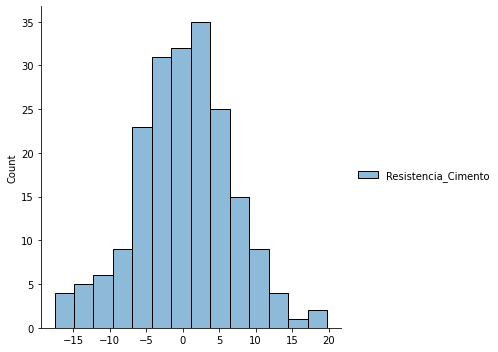

In [ ]:
# Vamos definir nosso pipeline
pipe = Pipeline((
    ('pt', PowerTransformer() ),
    ('lr', LinearRegression() ),
))

# Vamos ficar o Modelo
pipe.fit(x_treino, y_treino)

# Fazendo a previsao dos de teste
Previsao = pipe.predict( x_teste )

# ----------- Plotando o Erro do Modelo com o Escolanemento

# Verificando a assertividade do modelo
from sklearn import metrics

# Calculando o score da regressão
Score = pipe.score( x_treino, y_treino )

# Calculando o RMSE do modelo
RMSE = metrics.mean_absolute_error( y_teste, Previsao )

print('\n Score do modelo (R²): ', Score)
print('\n RMSE', RMSE , '\n' )
sns.displot( y_teste - Previsao );

Média geral dos teste: R²  0.7879191674682152


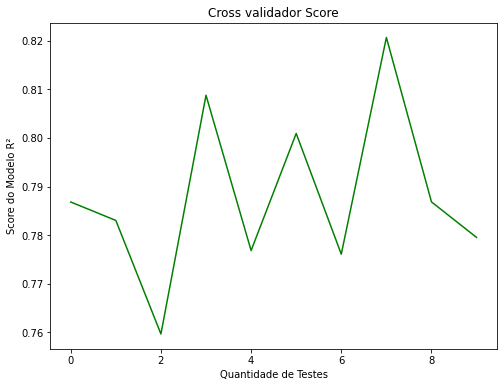

In [ ]:
# Vamos usar o Cross para rodar nossos dados e testar
Multiplos_Scores = cross_val_score( pipe,x_treino, y_treino ,cv=10)

print('Média geral dos teste: R² ', Multiplos_Scores.mean() )

# Definindo Tamanho do Gráfico
plt.figure(figsize=(8, 6)) 
plt.title('Cross validador Score')
plt.plot( Multiplos_Scores, color='Green' )
plt.xlabel('Quantidade de Testes')
plt.ylabel('Score do Modelo R²');

## **Vamos tentar melhorar ainda mais nosso modelo ...**

**Vamos usar outro tipo de pipeline**

In [ ]:
# Importar Lib para nosso pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE


 Score do modelo (R²):  0.9171165094561291

 RMSE 4.456512135861824 



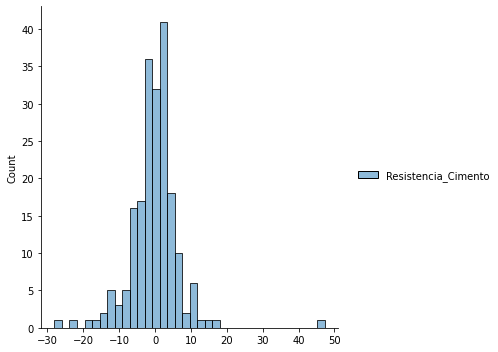

In [ ]:
# Vamos definir nosso pipeline
pipe = Pipeline((
    ('pt',PowerTransformer()),
    ('Poly',PolynomialFeatures(degree=3)),
    ('rfe',RFE(estimator=LinearRegression(),n_features_to_select=70,step=1,verbose=0)),
    ('lr',LinearRegression()),
))

# Vamos ficar o Modelo
pipe.fit(x_treino, y_treino)

# Fazendo a previsao dos de teste
Previsao = pipe.predict( x_teste )

# ----------- Plotando o Erro do Modelo com o Escolanemento

# Verificando a assertividade do modelo
from sklearn import metrics

# Calculando o score da regressão
Score = pipe.score( x_treino, y_treino )

# Calculando o RMSE do modelo
RMSE = metrics.mean_absolute_error( y_teste, Previsao )

print('\n Score do modelo (R²): ', Score)
print('\n RMSE', RMSE , '\n' )
sns.displot( y_teste - Previsao );

In [ ]:
print('Resultados Finais', '\n',
  '1º Teste - Tradicional: Score do modelo (R²):  0.6036657320434023', '\n',
  '2º Teste - Escalonamento : Score do modelo (R²):  0.594517569449642', '\n',
  '3º Teste - Pipe PowerTransformer : Score do modelo (R²):  0.7948950018263439', '\n',
  '4º Teste - Varios PipeLines : Score do modelo (R²):  0.9171165094561291', 'n' 
)

Resultados Finais 
 1º Teste - Tradicional: Score do modelo (R²):  0.6036657320434023 
 2º Teste - Escalonamento : Score do modelo (R²):  0.594517569449642 
 3º Teste - Pipe PowerTransformer : Score do modelo (R²):  0.7948950018263439 
 4º Teste - Varios PipeLines : Score do modelo (R²):  0.9171165094561291 n


In [ ]:
### Veja, com pipelines conseguimos melhorar a performance nosso modelo ;D

In [ ]:
pipe

Pipeline(steps=[('pt', PowerTransformer()),
                ('Poly', PolynomialFeatures(degree=3)),
                ('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=70)),
                ('lr', LinearRegression())])

In [ ]:
# Importando a biblioteca para salvar as variaveis
import pickle

# Exportando os dados do Modelo
with open('Modelo_Concreto_02.pkl', 'wb') as f:
  pickle.dump(Funcao_Regressao_Linear, f)

In [ ]:
for c,x in enumerate(Variaveis_Caracteristica.columns):
  print(c,x)

0 Cimento
1 Escória_Alto_Forno
2 Cinzas_volantes
3 Agua
4 Superplastificante
5 Agregado_Grosso
6 Agregado_fino
7 Idade


In [ ]:
Variaveis_Caracteristica.describe()

,Cimento,Escória_Alto_Forno,Cinzas_volantes,Agua,Superplastificante,Agregado_Grosso,Agregado_fino,Idade
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000
